In [1]:
from pyMCDS import pyMCDS
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

In [2]:
#print(mcds.get_cell_variables())
#print(mcds.get_substrate_names())

## All start with 200 Cancer Stem Cells and 100 Differentiate Cancer Cells

In [3]:
def get_inform(last_index,director):
    live_count = np.zeros( last_index+1 )
    dead_count = np.zeros( last_index+1 )
    csc_count = np.zeros( last_index+1 )
    dcc_count = np.zeros( last_index+1 )
    times = np.zeros( last_index+1 )
    for n in range( 0,last_index+1 ):
        filename='output'+"%08i"%n+'.xml'
        mcds=pyMCDS(filename,director)
        times[n]= mcds.get_time()
        cycle=mcds.data['discrete_cells']['cycle_model']
        live = np.argwhere(cycle<100).flatten()
        dead = np.argwhere(cycle>=100).flatten()
        cell_type=mcds.data['discrete_cells']['cell_type']
        cell_type=cell_type.astype(int)
        csc = np.argwhere(cell_type==1).flatten();
        dcc = np.argwhere(cell_type==2).flatten();
        csc = np.intersect1d(csc,live)
        dcc = np.intersect1d(dcc,live)
        live_count[n] = len(live)
        dead_count[n] = len(dead)
        csc_count[n] = len(csc)
        dcc_count[n] = len(dcc)
        if n == last_index:
            last_time_transition = mcds.data['discrete_cells']['transrate']
            last_time_pressure = mcds.data['discrete_cells']['pressure']
    return live_count,dead_count,csc_count,dcc_count,last_time_transition,last_time_pressure,cell_type,times,live

In [4]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output_control'
# control group 
live_count_cn,dead_count_cn,csc_count_cn, \
dcc_count_cn,last_time_transition_cn, \
last_time_pressure_cn,cell_type_cn,times,live_cn = get_inform(last_index,director) 

## Report on Cell Number, Last Time Transition Rate/ Pressure Distribtion for Control 

Text(0.5,1,'Live cells Pressure Distibution at t=168.0 hours')

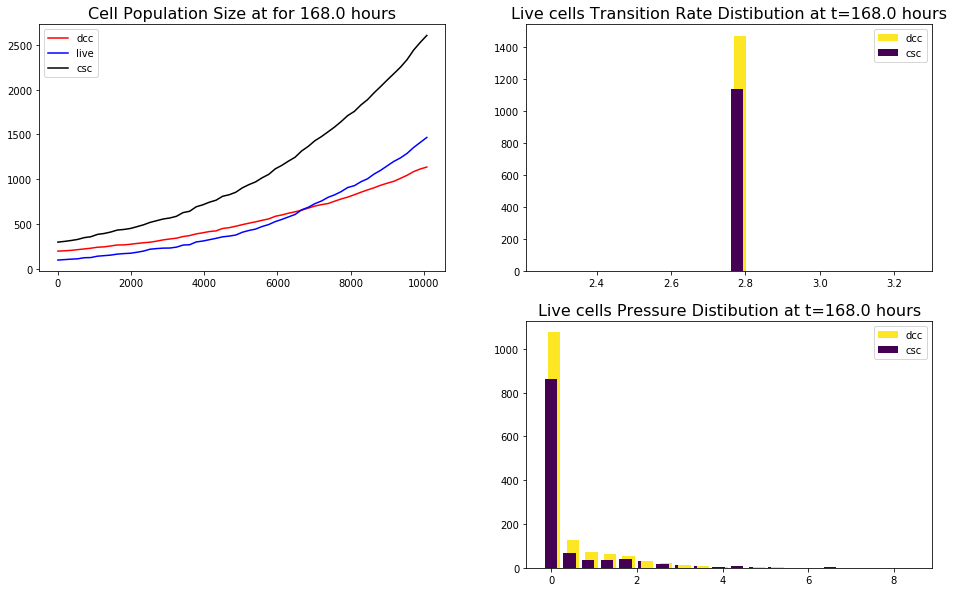

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot( times, csc_count_cn  , 'r-' )
plt.plot( times, dcc_count_cn  , 'b-' );
plt.plot( times, live_count_cn , 'k-' );
plt.legend( {'csc', 'dcc','live'} )
plt.title('Cell Population Size at for ' +str(times[-1]/60) + ' hours', size=16)
plt.subplot(222)
ml.histy(last_time_transition_cn[live_cn]*1e4,cell_type_cn[live_cn],bins=20)
plt.legend( {'csc', 'dcc'} )
plt.title('Live cells Transition Rate Distibution at t=' +str(times[-1]/60) + ' hours', size=16)
#plt.subplot(223)
#plt.title('Control Group', size=16)
plt.subplot(224)
ml.histy(last_time_pressure_cn[live_cn],cell_type_cn[live_cn],bins=20)
plt.legend( {'csc', 'dcc'} )
plt.title('Live cells Pressure Distibution at t=' +str(times[-1]/60) + ' hours', size=16)

In [6]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output_pressure'
# control group 
live_count_in,dead_count_in,csc_count_in, \
dcc_count_in,last_time_transition_in, \
last_time_pressure_in,cell_type_in,times,live_in = get_inform(last_index,director) 

In [7]:
last_time_transition_in

array([0.00000000e+00, 2.77777778e-04, 2.77777778e-04, ...,
       1.24098753e-05, 2.77777778e-04, 2.77777778e-04])

In [8]:
len(np.argwhere(last_time_transition_in[live_in]<0.0001))

272

## Report on Cell Number, Last Time Transition Rate/ Pressure Distribtion for Contact Inhibition Only

Text(0.5,1,'Live cells Pressure Distibution at t=168.0 hours')

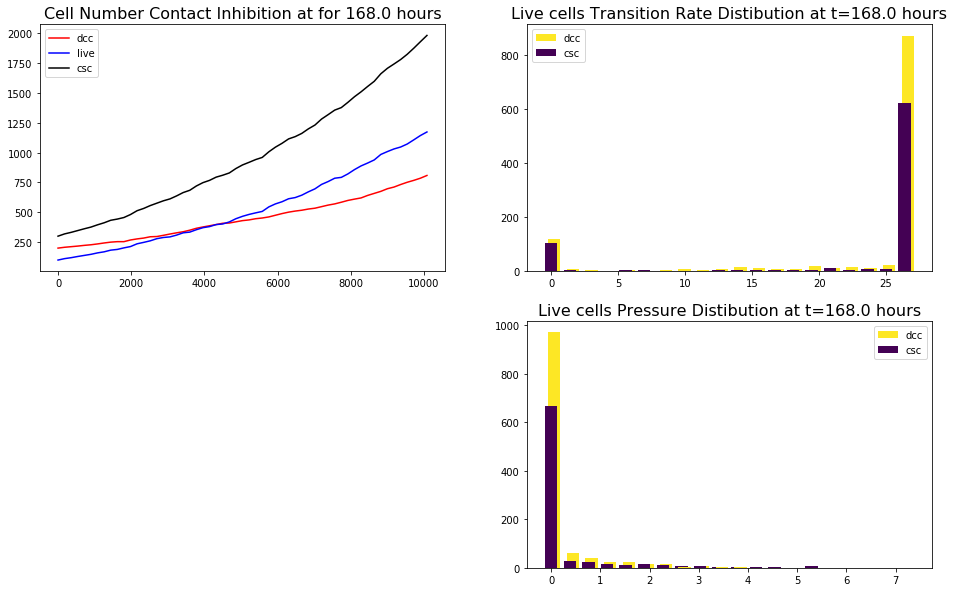

In [9]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot( times, csc_count_in  , 'r-' )
plt.plot( times, dcc_count_in  , 'b-' );
plt.plot( times, live_count_in , 'k-' );
plt.legend( {'csc', 'dcc','live'} )
plt.title('Cell Number Contact Inhibition at for ' +str(times[-1]/60) + ' hours', size=16)
plt.subplot(222)
ml.histy(last_time_transition_in[live_in]*1e5,cell_type_in[live_in],bins=20)
plt.legend( {'csc', 'dcc'} )
plt.title('Live cells Transition Rate Distibution at t=' +str(times[-1]/60) + ' hours', size=16)
plt.subplot(224)
ml.histy(last_time_pressure_in[live_in],cell_type_in[live_in],bins=20)
plt.legend( {'csc', 'dcc'} )
plt.title('Live cells Pressure Distibution at t=' +str(times[-1]/60) + ' hours', size=16)

# Control vs. Contaction Inhibition (pressure on transition rate)

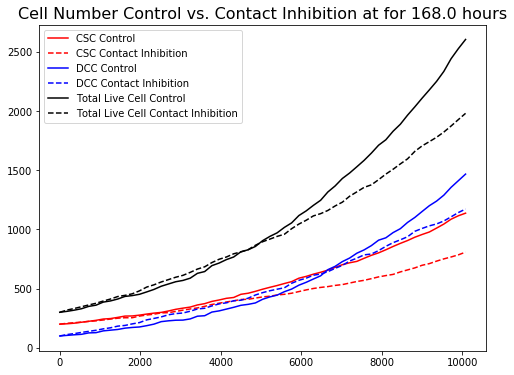

In [10]:
plt.figure(figsize=(8,6))
plt.plot( times, csc_count_cn  , 'r-' )
plt.plot( times, csc_count_in  , 'r--' )
plt.plot( times, dcc_count_cn  , 'b-' );
plt.plot( times, dcc_count_in  , 'b--' );
plt.plot( times, live_count_cn , 'k-' );
plt.plot( times, live_count_in , 'k--' );
plt.title('Cell Number Control vs. Contact Inhibition at for ' +str(times[-1]/60) + ' hours', size=16)
plt.legend( ['CSC Control', 'CSC Contact Inhibition','DCC Control',
             'DCC Contact Inhibition','Total Live Cell Control',
             'Total Live Cell Contact Inhibition'] )

## From now on, use the Contact Inhibition as control.

## Contact Inhibtion (Control) vs. Feedback(from cell number) on Transition Rate

### feedback_multiplier = 1/(1+0.0005*(*all_cells).size());

In [11]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output_feeback_on_tranistion'
# control group 
live_count_ft,dead_count_ft,csc_count_ft, \
dcc_count_ft,last_time_transition_ft, \
last_time_pressure_ft,cell_type_ft,times,live_ft = get_inform(last_index,director) 

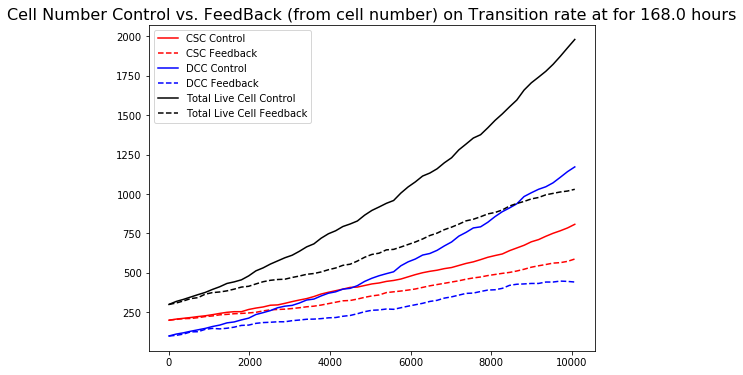

In [12]:
plt.figure(figsize=(8,6))
plt.plot( times, csc_count_in  , 'r-' )
plt.plot( times, csc_count_ft  , 'r--' )
plt.plot( times, dcc_count_in  , 'b-' );
plt.plot( times, dcc_count_ft  , 'b--' );
plt.plot( times, live_count_in , 'k-' );
plt.plot( times, live_count_ft , 'k--' );
plt.title('Cell Number Control vs. FeedBack (from cell number) on Transition rate at for ' +str(times[-1]/60) + ' hours', size=16)
plt.legend( ['CSC Control', 'CSC Feedback','DCC Control',
             'DCC Feedback','Total Live Cell Control',
             'Total Live Cell Feedback'] )

## Contact Inhibtion (Control) vs. Feedback(from cell number) on Differentiation Probability

###  multiplier_prob =1/(1+0.005*(*all_cells).size()) * parameters.doubles( "differentiation_probability" );

In [13]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output_feedback_on_probability'
# control group 
live_count_fp,dead_count_fp,csc_count_fp, \
dcc_count_fp,last_time_transition_fp, \
last_time_pressure_fp,cell_type_fp,times,live_fp = get_inform(last_index,director) 

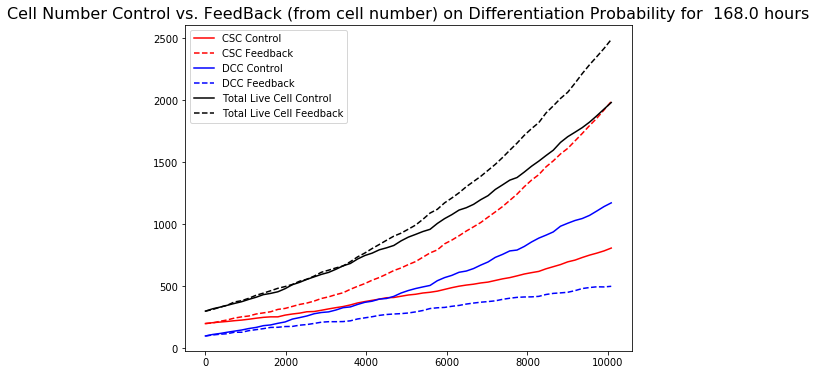

In [14]:
plt.figure(figsize=(8,6))
plt.plot( times, csc_count_in  , 'r-' )
plt.plot( times, csc_count_fp  , 'r--' )
plt.plot( times, dcc_count_in  , 'b-' );
plt.plot( times, dcc_count_fp  , 'b--' );
plt.plot( times, live_count_in , 'k-' );
plt.plot( times, live_count_fp , 'k--' );
plt.title('Cell Number Control vs. FeedBack (from cell number) on Differentiation Probability for  ' +str(times[-1]/60) + ' hours', size=16)
plt.legend( ['CSC Control', 'CSC Feedback','DCC Control',
             'DCC Feedback','Total Live Cell Control',
             'Total Live Cell Feedback'] )

## Contact Inhibtion vs. Radiothearpy at 4&5 Day

## death_prob = 1.0-exp(-alpha_DCC*dose-beta_DCC*dose*dose);

In [15]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output_Radio'
# control group 
live_count_rd,dead_count_rd,csc_count_rd, \
dcc_count_rd,last_time_transition_rd, \
last_time_pressure_rd,cell_type_rd,times,live_rd = get_inform(last_index,director) 

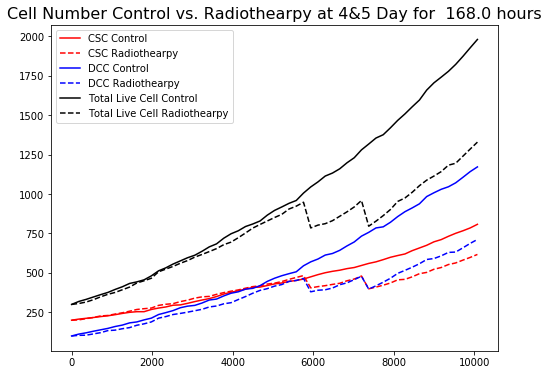

In [16]:
plt.figure(figsize=(8,6))
plt.plot( times, csc_count_in  , 'r-' )
plt.plot( times, csc_count_rd  , 'r--' )
plt.plot( times, dcc_count_in  , 'b-' );
plt.plot( times, dcc_count_rd  , 'b--' );
plt.plot( times, live_count_in , 'k-' );
plt.plot( times, live_count_rd , 'k--' );
plt.title('Cell Number Control vs. Radiothearpy at 4&5 Day for  ' +str(times[-1]/60) + ' hours', size=16)
plt.legend( ['CSC Control', 'CSC Radiothearpy','DCC Control',
             'DCC Radiothearpy','Total Live Cell Control',
             'Total Live Cell Radiothearpy'] )

## Radiothearpy at 4&5 Day vs. Radiothearpy at 4&5 Day Dedifferentiation

### Defifferentiation rate = 0.8

In [17]:
last_index = 56
director = 'C:\\Users\Yushang\Desktop\master\output'
# control group 
live_count_rdd,dead_count_rdd,csc_count_rdd, \
dcc_count_rdd,last_time_transition_rdd, \
last_time_pressure_rdd,cell_type_rdd,times,live_rdd = get_inform(last_index,director) 

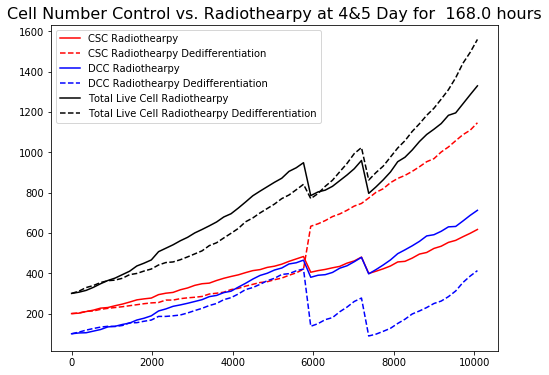

In [18]:
plt.figure(figsize=(8,6))
plt.plot( times, csc_count_rd  , 'r-' )
plt.plot( times, csc_count_rdd  , 'r--' )
plt.plot( times, dcc_count_rd  , 'b-' );
plt.plot( times, dcc_count_rdd  , 'b--' );
plt.plot( times, live_count_rd , 'k-' );
plt.plot( times, live_count_rdd , 'k--' );
plt.title('Cell Number Control vs. Radiothearpy at 4&5 Day for  ' +str(times[-1]/60) + ' hours', size=16)
plt.legend( ['CSC Radiothearpy', 'CSC Radiothearpy Dedifferentiation','DCC Radiothearpy',
             'DCC Radiothearpy Dedifferentiation','Total Live Cell Radiothearpy',
             'Total Live Cell Radiothearpy Dedifferentiation'] )